In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Fields and explanations in metadata.tsv :
- show_uri :  Spotify uri for the show. e.g. `spotify:show:7gozmLqbcbr6PScMjc0Zl4`
- show_name :  Name of the show. e.g. Reply All
- show_description : Description of the show. e.g. "'A podcast about the internet' that is actual…”
- publisher : Publisher of the show. e.g. Gimlet
- language : Language the show is in in BCP 47 format. e.g. [en]
- rss_link: links of show rss feed. e.g. https://feeds.megaphone.fm/replyall
- episode_uri : Spotify uri for the episode. e.g. `spotify:episode:4vYOibPeC270jJlnRoAVO6`
- episode_name : Name of the episode. e.g. #109 Is Facebook Spying on You?
- episode_description :	Description of the episode. e.g. “This year we’ve gotten one question more than …”
- duration : duration of the episode in minutes. e.g. 31.680000
- show_filename_prefix: Filename_prefix of the show. e.g. `show_7gozmLqbcbr6PScMjc0Zl4`
- episode_filename_prefix: Filename_prefix of the episode. e.g. `4vYOibPeC270jJlnRoAVO6`

In [3]:
meta_data = pd.read_csv("metadata.tsv", sep = "\t")
print(f"rows: {meta_data.shape[0]}, columns: {meta_data.shape[1]}")
meta_data.head(3)

rows: 105360, columns: 12


,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix
0,spotify:show:2NYtxEZyYelR6RMKmjfPLB,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,['en'],https://anchor.fm/s/11b84b68/podcast/rss,spotify:episode:000A9sRBYdVh66csG2qEdj,1: It’s Christmas Time!,On the first ever episode of Kream in your Kof...,12.700133,show_2NYtxEZyYelR6RMKmjfPLB,000A9sRBYdVh66csG2qEdj
1,spotify:show:15iWCbU7QoO23EndPEO6aN,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],https://anchor.fm/s/b07181c/podcast/rss,spotify:episode:000HP8n3hNIfglT2wSI2cA,The Goleta Postal Facility shootings- January ...,"See something, say something. It’s a mantra ma...",6.019383,show_15iWCbU7QoO23EndPEO6aN,000HP8n3hNIfglT2wSI2cA
2,spotify:show:6vZRgUFTYwbAA79UNCADr4,Inside The 18 : A Podcast for Goalkeepers by G...,Inside the 18 is your source for all things Go...,Inside the 18 GK Media,['en'],https://anchor.fm/s/81a072c/podcast/rss,spotify:episode:001UfOruzkA3Bn1SPjcdfa,Ep.36 - Incorporating a Singular Goalkeeping C...,Today’s episode is a sit down Michael and Omar...,43.616333,show_6vZRgUFTYwbAA79UNCADr4,001UfOruzkA3Bn1SPjcdfa


In [4]:
# Number of unique values in each col
print("\033[1m", "Column   Unique values", "\033[0m")
for column in meta_data.columns:
    print(f"{column},    {len(meta_data[column].unique())}")
    

 Column   Unique values 
show_uri,    18376
show_name,    18290
show_description,    18322
publisher,    17490
language,    20
rss_link,    18376
episode_uri,    105360
episode_name,    103660
episode_description,    100879
duration,    90916
show_filename_prefix,    18376
episode_filename_prefix,    105360


**Observations**
- 20 languages
- About 2000 podcasts have the same name (diff episode_uri and episode_name)
- There are 32 more show descriptions than unique shows


In [5]:
print(meta_data.language.unique())
print("Mostly variations of english")

["['en']" "['en-US']" "['en-AU']" "['en-CA']" "['en-GB']" "['en-NZ']"
 "['en-IE']" "['ms']" "['en-PH']" "['ta']" "['en-ZA']" "['id']"
 "['nl-BE']" "['ga']" "['en-JM']" "['hi']" "['ml']" "['en-IN']" "['es']"
 "['pt']"]
Mostly variations of english


In [6]:
# Any missing values?
meta_data.isna().sum()

show_uri                     0
show_name                    0
show_description             2
publisher                    0
language                     0
rss_link                     0
episode_uri                  0
episode_name                 0
episode_description        205
duration                     0
show_filename_prefix         0
episode_filename_prefix      0
dtype: int64

In [7]:
missing_show_desc = meta_data[meta_data.show_description.isnull()]
print(f"Number of missing values: {len(missing_show_desc)}")
missing_show_desc

Number of missing values: 2


,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix
19448,spotify:show:5yyAtVyZOnmu0HQTg6fAY6,Walking With Anxiety,NaN,Big Red World,['en'],https://anchor.fm/s/8230458/podcast/rss,spotify:episode:1R1AAsxRZGYmbebqvLQBUN,How Can You Make Anxiety Easier at Work?,"Having a bad anxiety day is bad enough, but wh...",13.685783,show_5yyAtVyZOnmu0HQTg6fAY6,1R1AAsxRZGYmbebqvLQBUN
29431,spotify:show:5yyAtVyZOnmu0HQTg6fAY6,Walking With Anxiety,NaN,Big Red World,['en'],https://anchor.fm/s/8230458/podcast/rss,spotify:episode:2AMc4x73zD0UoognHZUMb1,How to Deal With Anxiety Digestion Issues,A common issue with anxiety and high stress le...,9.889167,show_5yyAtVyZOnmu0HQTg6fAY6,2AMc4x73zD0UoognHZUMb1


In [8]:
missing_ep_desc = meta_data[meta_data.episode_description.isnull()]
print(f"Number of missing values: {len(missing_ep_desc)}")
missing_ep_desc.head()

Number of missing values: 205


,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix
960,spotify:show:0oKpjc2vMk8sgHdMWwln1z,The Caffeinated Mommy,Got the Monday blues? Not anymore!!! Grab your...,Hannah Sims,['en'],https://anchor.fm/s/1088e9c8/podcast/rss,spotify:episode:04O0utvoiChufyNkGCoKcC,The Caffeinated Mommy (Trailer),NaN,0.845600,show_0oKpjc2vMk8sgHdMWwln1z,04O0utvoiChufyNkGCoKcC
1253,spotify:show:7uBzGb9hPrzPWCpFfmqVkO,The Slap With YOUFO,"since youfo’s youtube channel got hacked, he h...",YOUFO,['en'],https://anchor.fm/s/119a7e80/podcast/rss,spotify:episode:05nTxSbphp9IjrRFGQ7hb5,The Slap With YOUFO (Trailer),NaN,0.981050,show_7uBzGb9hPrzPWCpFfmqVkO,05nTxSbphp9IjrRFGQ7hb5
1713,spotify:show:0fBZSDgJhCAXwPIjxVWgwA,CM SALT,Cougar Updates Cover art photo provided by He...,Jeremy Robinson,['en'],https://anchor.fm/s/102bb6cc/podcast/rss,spotify:episode:07dkFRYqY7X4r1LM8r8W6z,Fall Review 2019,NaN,19.480767,show_0fBZSDgJhCAXwPIjxVWgwA,07dkFRYqY7X4r1LM8r8W6z
1961,spotify:show:5JFugv0GD68SZC0Cuh1wXi,The Besties,It's Game of the Year meets King of the Hill a...,Spotify Studios,['en'],https://feeds.megaphone.fm/besties-spotify,spotify:episode:08pvDQgihgEfZx7bROPynB,The Besties Podcast XXV,NaN,41.149383,show_5JFugv0GD68SZC0Cuh1wXi,08pvDQgihgEfZx7bROPynB
2405,spotify:show:79mmtofMUcMr9GZH5xS6Ll,Skystrology’s Where are the planets this week?,"Do you know which constellations the Sun, the ...",Chapeau aka Cloudette,['en'],https://anchor.fm/s/b7c294/podcast/rss,spotify:episode:0AwJHf28FF2BWhyTln4p8R,Skystrology’s Where are the planets this week?...,NaN,0.917967,show_79mmtofMUcMr9GZH5xS6Ll,0AwJHf28FF2BWhyTln4p8R


Number of unique shows: 18290
Number of unique show descriptions: 18322
Max no episodes of one show: 1072, Min: 1
Numer of shows represented by only one episode: 8632
Numer of shows represented by less than 10 episodes: 16354


Text(0.5, 1.0, 'Distribution of episodes per show')

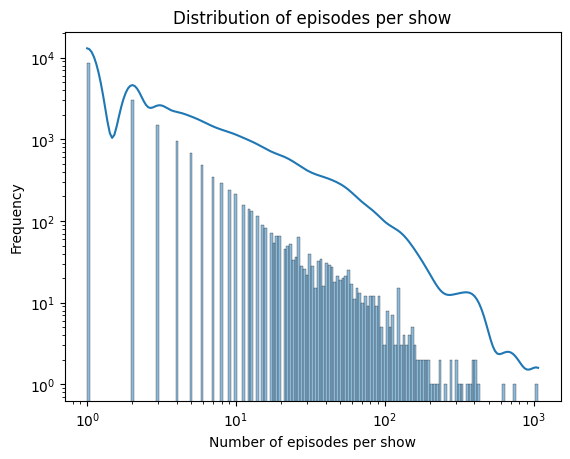

In [9]:
print(f"Number of unique shows: {len(meta_data.show_name.unique())}")
print(f"Number of unique show descriptions: {len(meta_data.show_description.unique())}")
# 32 rows are not coherent with rest of dataset. Drop?

# Check out episodes per show distribution
ep_per_show = meta_data.groupby(meta_data.show_name)["show_name"].count()
print(f"Max no episodes of one show: {max(ep_per_show.values)}, Min: 1")
one = ep_per_show[ep_per_show == 1]
print(f"Numer of shows represented by only one episode: {len(one)}")
ten = ep_per_show[ep_per_show <= 10]
print(f"Numer of shows represented by less than 10 episodes: {len(ten)}")


ep_per_show = ep_per_show.sort_values(ascending=False)
# ep_per_show.head(20)

# plot dist of episodes represented by less than 200 episodes
two_hundred = ep_per_show[ep_per_show <= 200]

ax = sns.histplot(x = ep_per_show.values, log_scale = (True, True), bins=len(ep_per_show.unique()), kde = True)
ax.set_xlabel("Number of episodes per show")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of episodes per show")

Text(0, 0.5, 'Frequency')

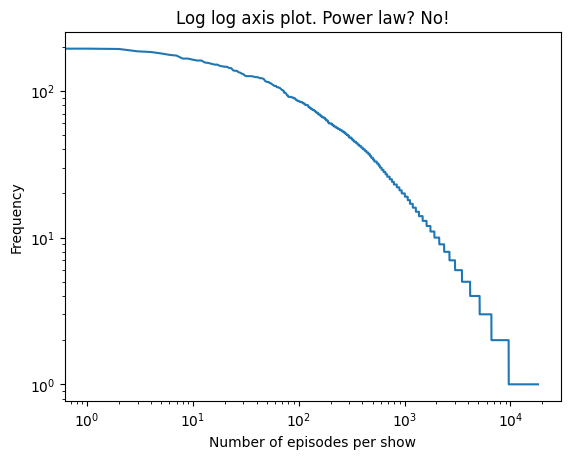

In [10]:
# power law dist?

plt.loglog(two_hundred.values) # Not a power law
# sns.histplot(ep_per_show.values, log_scale=(True, True), kde=True)
plt.title("Log log axis plot. Power law? No!")
plt.xlabel("Number of episodes per show")
plt.ylabel("Frequency")

In [11]:
print(meta_data.describe())  # only continous variables = duration
print("median", meta_data.duration.median())

            duration
count  105360.000000
mean       33.845715
std        22.735674
min         0.175317
25%        13.552638
50%        31.643375
75%        50.446825
max       304.953900
median 31.643375


Min length of podcast: 0.18 min
Max length of podcast: 304.95 min


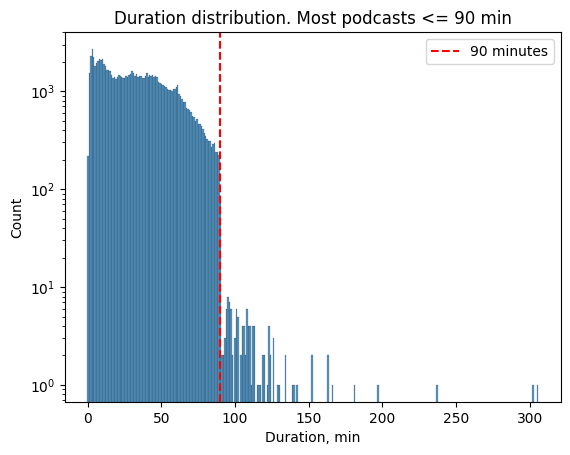

In [12]:
# Duration distribution
print(f"Min length of podcast: {min(meta_data.duration):.2f} min\nMax length of podcast: {max(meta_data.duration):.2f} min")

ax = sns.histplot(x=meta_data.duration, log_scale=(False, True), discrete=True)
ax.set_title("Duration distribution. Most podcasts <= 90 min")
ax.set_xlabel("Duration, min")
ax.axvline(x=90, color = "red", linestyle = "--", label="90 minutes")
ax.legend()